In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import cross_val_score

print('set_up complete')

set_up complete


In [2]:
df=pd.read_csv('C:/Users/amose/OneDrive/Desktop/Datasets/Company bankrupy data.csv')
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data = df.drop(labels='Bankrupt', axis=1)
target= df.Bankrupt

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

c:\users\amose\appdata\local\programs\python\python39\scripts\opencv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9552785923753666

Text(87.0, 0.5, 'Truth')

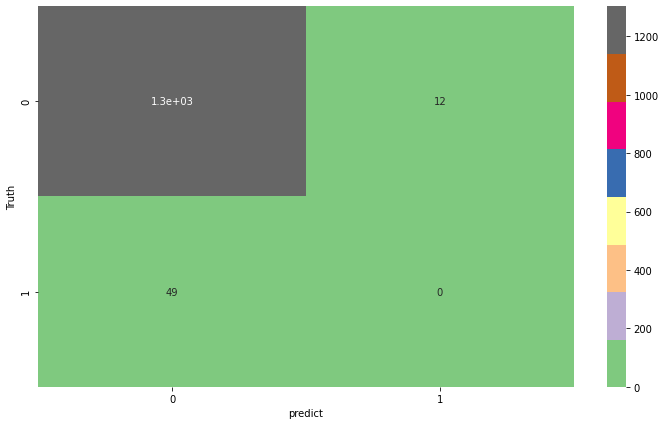

In [7]:
lr_predict = lr.predict(x_test)
cm_lr=confusion_matrix(y_test, lr_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_lr, cmap='Accent', annot= True)
plt.xlabel('predict')
plt.ylabel('Truth')

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree.score(x_test,y_test)


0.9530791788856305

Text(87.0, 0.5, 'Truth')

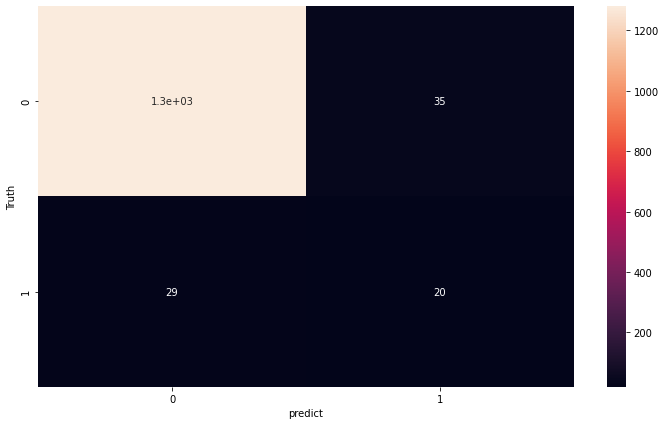

In [9]:
tree_predict= tree.predict(x_test)
cm_tree=confusion_matrix(y_test,tree_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_tree, annot= True)
plt.xlabel('predict')
plt.ylabel('Truth')

In [10]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)
svm.score(x_test,y_test)

0.9640762463343109

Text(87.0, 0.5, 'Truth')

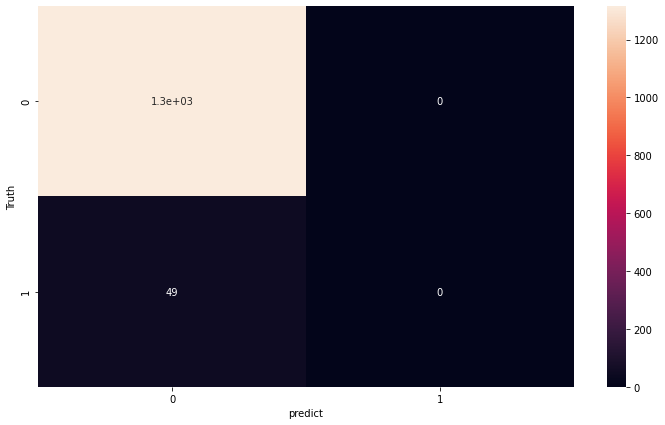

In [11]:
svm_predict= svm.predict(x_test)
cm_svm=confusion_matrix(y_test,svm_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_svm, annot= True)
plt.xlabel('predict')
plt.ylabel('Truth')

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.968475073313783

Text(69.0, 0.5, 'Truth')

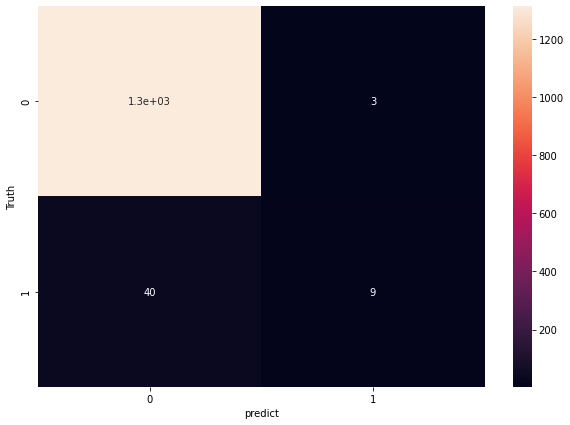

In [13]:
rf_predict= rf.predict(x_test)
cm_rf=confusion_matrix(y_test,rf_predict)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot= True)
plt.xlabel('predict')
plt.ylabel('Truth')

In [14]:
from sklearn.linear_model import Perceptron
perc=Perceptron()
perc.fit(x_train, y_train)
perc.score(x_test,y_test)

0.9552785923753666

Text(87.0, 0.5, 'Truth')

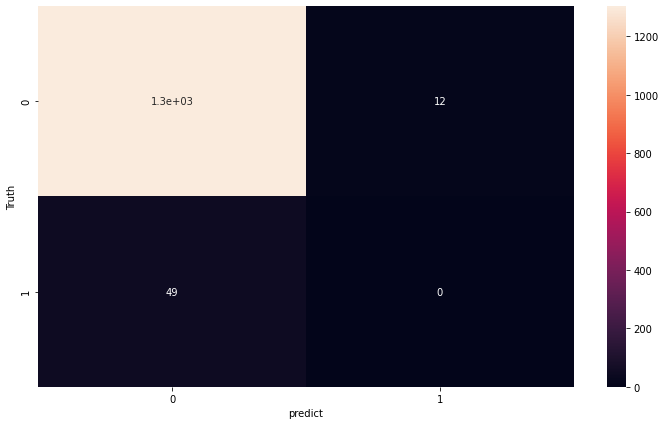

In [15]:
perc_predict= perc.predict(x_test)
cm_perc=confusion_matrix(y_test,perc_predict)
plt.figure(figsize=(12,7))
sns.heatmap(cm_perc, annot= True)
plt.xlabel('predict')
plt.ylabel('Truth')

Text(0, 0.5, 'model accuracy')

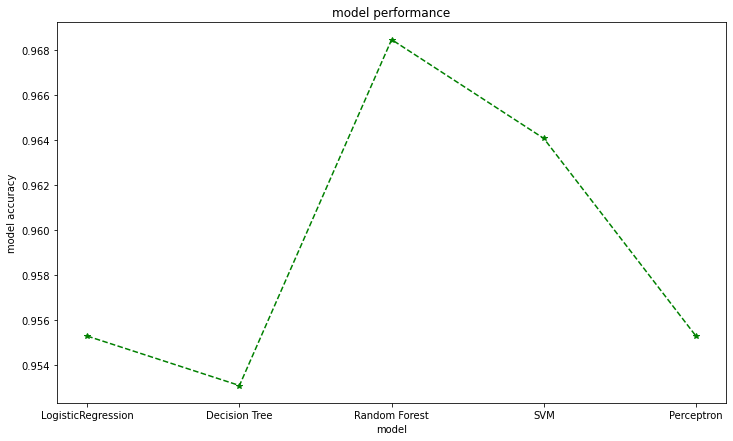

In [16]:
model_X= ['LogisticRegression', 'Decision Tree', 'Random Forest', 'SVM', 'Perceptron']
model_Y= [lr.score(x_test,y_test),tree.score(x_test,y_test),rf.score(x_test,y_test), svm.score(x_test,y_test),perc.score(x_test,y_test)]
plt.figure(figsize=(12,7))
plt.plot(model_X, model_Y, color='green', marker='*', linestyle='dashed')
plt.title('model performance')
plt.xlabel('model')
plt.ylabel('model accuracy')

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(kernel='rbf', gamma='auto', C=30), data, target, cv=3)


array([0.96744391, 0.96788385, 0.96788385])

In [18]:
cross_val_score(RandomForestClassifier(n_estimators=10, criterion='gini'), data, target, cv=3)

array([0.96436428, 0.96392433, 0.9692037 ])

In [19]:
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
        'C':[1,10,20],
        'kernel':['rbf','linear']
         }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':RandomForestClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
        
    }
        
}

In [ ]:
scores=[]
for model_name,mp in model_params.items():
    clf= GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
    clf.fit(data,target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [ ]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df